# Consider the following function

***Note***: **Ploting markers are optional for this assignment**

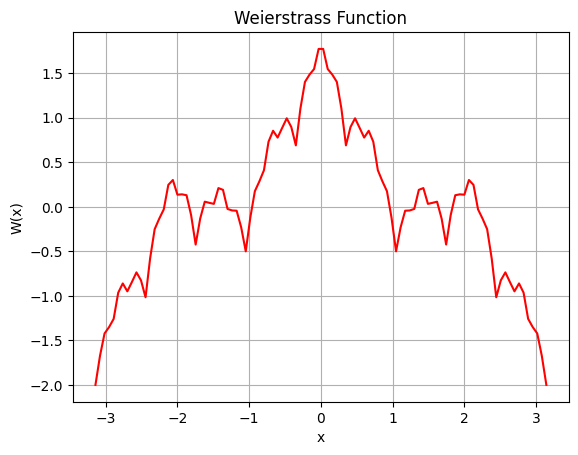

In [1]:
import numpy as np
import numpy.linalg as npl
import scipy.sparse as sps
import matplotlib.pyplot as plt
import math

# Weierstrass function
def W(x, a=0.5, b=3, terms=100):
    return sum(a**n * np.cos(b**n * x) for n in range(terms))

# Generate x values
num_points = 100
x = np.linspace(-np.pi, np.pi, num_points)

# Compute the Weierstrass function for all x
W_values = W(x)

# Plotting
plt.plot(x, W_values, color='red')
plt.title('Weierstrass Function')
plt.xlabel('x')
plt.ylabel('W(x)')
plt.grid()
plt.show()


- You are provided with data for 𝑥 and 𝑊 containing a predefined Monster function. Your task is to construct 𝑝(𝑥) for 12 points (for lagrange and newton method) for spline see following table, and then you need to test how closely 𝑝(𝑥) approximates the values of the mentioned function. You must also calculate the RMSE and plot the results step by step as demonstrated in this notebook. Also fill the values from your experment in following table.

# Comparison of Interpolation Techniques

| Interpolation Method             |          RMSE          |             Approximation Comments              |
|:--------------------------------:|:----------------------:|:-----------------------------------------------:|
| Lagrange interpolation| 0.3246522310463251     | Can produce large oscillations.  |
| Newton's Divided Difference      | 0.32465223104632424    | better than lagrange accuracy.          |
| Cubic Spline (n = 12)           | 0.2884960967361279     | better than both of above approximation.     |
| Cubic Spline (n = 24)           | 0.14753128378814898    | More better.|
| Cubic Spline (n = 48)           | 0.12084084117682951    | Best            |


In [2]:
# Complete the following function

def RMSE(y_actual, y_predicted):
    MSE = np.square(np.subtract(y_actual,y_predicted)).mean()
    return math.sqrt(MSE)



## Lagrange: Compute $L_i(x)$ here

In [3]:
# TODO: implement lagrange basis for polynomial interpolation
def lagrange_basis(z, x):
# Compute the Lagrange basis l_i(z)
# given the nodes x_i stored in vector x`
    n = len(x)
    m = len(z)
    basis = np.ones((n, m))
    for i in range(n):
        for j in range(n):
            if i != j:
                basis[i,:] *= (z-x[j])/(x[i]-x[j])
    return basis




## Lagrange: Calculate $p(x)$ through $L_i(x)$

In [4]:
# TODO: this functions performs evaluation of polynomial using coefficients computed from direct method
# z is the list of input numbers
# x and y are given 12 data points

def lagrange_interpolant(z, x, y):
#Compute the interpolant using Lagrange polynomials
    n = len(x)
    m = len(z)
    P = np.zeros(m)
    basis = lagrange_basis(z, x)
    for i in range(n):
        P += basis[i,:] * y[i]
    return P

## Lagrange: Testing

In [5]:
import math

In [6]:
x = np.linspace(-np.pi, np.pi, 12)
y=W(x)

z = np.linspace(-np.pi, np.pi, 100)
yz = lagrange_interpolant(z, x, y)


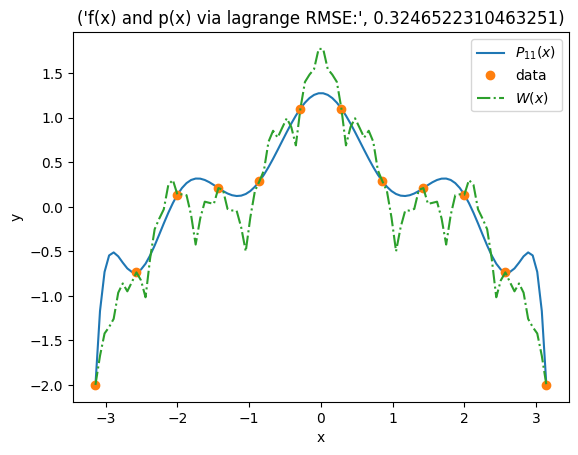

In [7]:
# plot your results as according to following example, you must provide RMSE Value as well

plt.title( f'{'f(x) and p(x) via lagrange RMSE:', RMSE(W(z), yz) }')
plt.plot(z,yz,'-')
plt.plot(x,y,'o')
plt.plot(z,W(z),'-.')
plt.legend(["$P_{11}(x)$","data","$W(x)$"])
plt.xlabel('x'); plt.ylabel('y'); plt.show()


In [8]:
RMSE(W(z), yz)

0.3246522310463251

In [9]:
# Complete the following two functions for newton method

def poly_coeffs(x, y):
    n = len(x)
    a = y.copy()
    for k in range(1,n):
        a[k:n] = (a[k:n] - a[k-1])/(x[k:n] - x[k-1])
    return a

#========================================================================

def poly_evaluation(a,x,z):
    #Evaluation of the polynomial with coefficients a at the points z
    N = len(x) - 1 #Degree of polynomial
    p = a[N]
    for k in range(1,N+1):
        p = a[N-k] + (z - x[N-k])*p
    return p



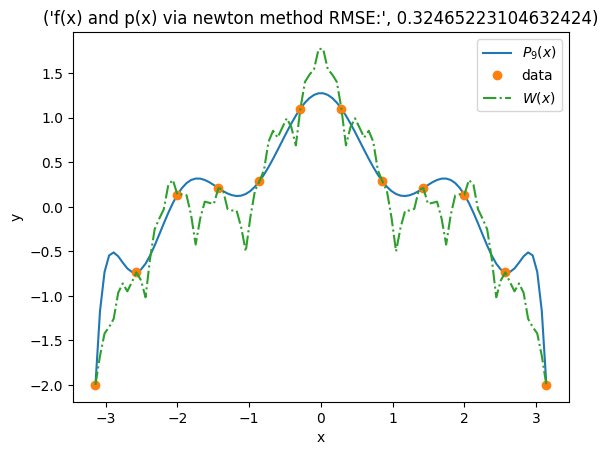

In [10]:
# plot your results as according to following example, you must provide RMSE Value as well
a = poly_coeffs(x, y)
yz = poly_evaluation(a,x,z)
plt.plot(z,yz,'-')
plt.plot(x,y,'o')
plt.title( f'{'f(x) and p(x) via newton method RMSE:', RMSE(W(z), yz) }')
plt.plot(z,W(z),'-.')
plt.legend(["$P_9(x)$","data","$W(x)$"])
plt.xlabel('x'); plt.ylabel('y'); plt.show()

In [11]:
RMSE(W(z), yz) 

0.32465223104632424

In [12]:

# TODO: Complete the following


def MyCubicSpline(x, y, dy0, dyN):
    # Returns the moments of f given the data x, y
    # dy0 is the derivative at the left boundary
    # dyN is the derivative at the right boundary
    n = len(x)
    c = np.zeros(n); v = np.zeros(n); u = np.zeros(n-1)
    l = np.zeros(n-1); b = np.zeros(n-1); h = np.zeros(n-1)
    for i in range(n-1):
        h[i] = x[i+1] - x[i]
        b[i] = (y[i+1]-y[i])/h[i] 
    u[0] = 1.0
    v[0] = 6.0*(b[0]-dy0)/h[0]
    c[0] = 2.0
    for i in range(1,n-1):
        c[i] = 2.0
        u[i] = h[i]/(h[i-1] + h[i])
        l[i-1] = h[i-1]/(h[i-1] + h[i])
        v[i] = 6.0*(b[i]-b[i-1])/(h[i-1] + h[i])
    l[n-2] = 1.0
    c[n-1] = 2.0
    v[n-1] = 6.0*(dyN-b[n-2])/h[n-2]
    diagonals = [c, l, u]
    A = sps.diags(diagonals, [0, -1, 1]).todense()
    z = npl.solve(A,v)
    return z

In [13]:
# TODO: Complete the following

def EvalCubicSpline(x, y, z, xx):
    # Returns the cubic spline evaluated at xx
    # z = the moments of the cubic spline
    # xx = the vector with values of x on which we want the cubic spline
    n = len(x)
    m = len(xx)
    yy = np.zeros(m)
    for j in range(m):
        xvalue = xx[j]
        # First detect the index i
        for i in range(n-2, -1, -1):
            if (xvalue - x[i] >= 0.0):
                break
    # Implement formula (\ref{eq:clmbcbspl})
        h = x[i+1] - x[i]
        B = -h*z[i+1]/6.0-h*z[i]/3.0+(y[i+1]-y[i])/h
        tmp =z[i]/2.0+(xvalue-x[i])*(z[i+1]-z[i])/6.0/h        
        tmp = B+(xvalue-x[i])*tmp     
        yy[j] = y[i] + (xvalue - x[i])*tmp   
    return yy

In [14]:

# Finite difference approximation of the derivative
def dW(W, x, h=1e-5):
    return (W(x + h) - W(x - h)) / (2 * h)


Text(0.5, 1.0, 'f(x) and p(x) via cubic spline having 12, RMSE: 0.2884960967361279')

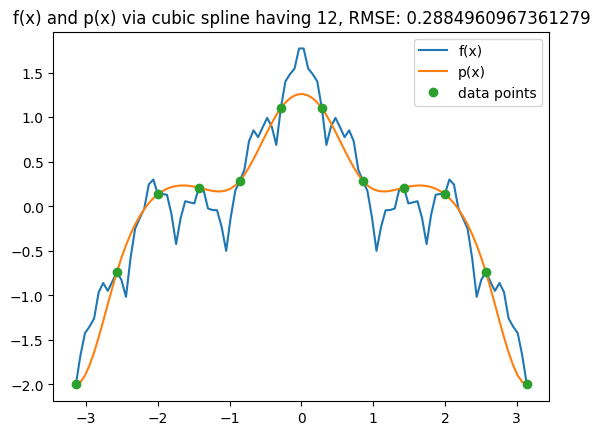

In [15]:
# plot your results as according to following example, you must provide RMSE Value as well
n=12
x = np.linspace(-np.pi, np.pi, n)
y = W(x)
z = dW(W,x)
xx = np.linspace(-np.pi,np.pi,100)
yy = W(xx)
ss = MyCubicSpline(x, y, z[0], z[-1])
zz=EvalCubicSpline(x, y, ss, xx)
plt.plot(xx,yy,xx,zz,x,y,'o')
plt.legend(['f(x)','p(x)','data points'])
rmse_value = RMSE(yy, zz)
plt.title(f'f(x) and p(x) via cubic spline having = {n}, RMSE: {rmse_value}')

Text(0.5, 1.0, 'f(x) and p(x) via cubic spline having 24, RMSE: 0.14753128378814898')

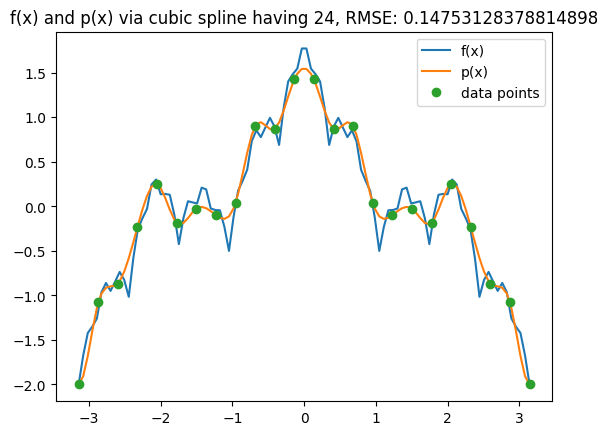

In [16]:
# plot your results as according to following example, you must provide RMSE Value as well

n=24
x = np.linspace(-np.pi, np.pi, n)
y = W(x)
z = dW(W,x)
xx = np.linspace(-np.pi,np.pi,100)
yy = W(xx)
ss = MyCubicSpline(x, y, z[0], z[-1])
zz=EvalCubicSpline(x, y, ss, xx)
plt.plot(xx,yy,xx,zz,x,y,'o')
plt.legend(['f(x)','p(x)','data points'])
rmse_value = RMSE(yy, zz)
plt.title(f'f(x) and p(x) via cubic spline having n= {n}, RMSE: {rmse_value}')

Text(0.5, 1.0, 'f(x) and p(x) via cubic spline having 48, RMSE: 0.12084084117682951')

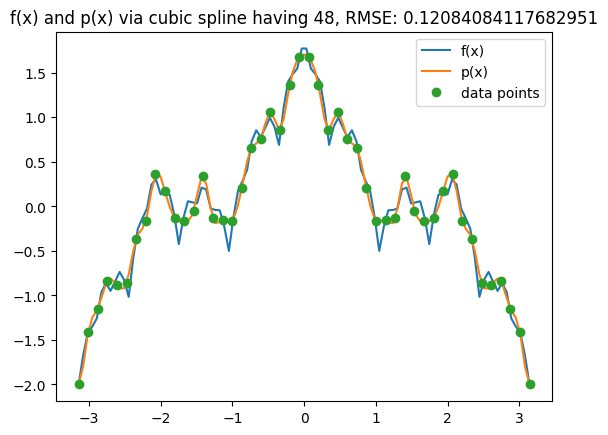

In [17]:
# plot your results as according to following example, you must provide RMSE Value as well


n=48
x = np.linspace(-np.pi, np.pi, n)
y = W(x)
z = dW(W,x)
xx = np.linspace(-np.pi,np.pi,100)
yy = W(xx)
ss = MyCubicSpline(x, y, z[0], z[-1])
zz=EvalCubicSpline(x, y, ss, xx)
plt.plot(xx,yy,xx,zz,x,y,'o')
plt.legend(['f(x)','p(x)','data points'])
rmse_value = RMSE(yy, zz)
plt.title(f'f(x) and p(x) via cubic spline having n={n}, RMSE: {rmse_value}')
